# EDA

### Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

### Preview Data

In [3]:
data = pd.read_csv('tripadvisor_hotel_reviews.csv')
data.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


### Rating Analysis

In [4]:
data['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

Split Rating into Positive and Negative

In [5]:
# rating 4, 5 => Positive; 1, 2, 3 => Negative
def ratings(rating):
    if rating>3 and rating<=5:
        return "Positive"
    if rating>0 and rating<=3:
        return "Negative"

data['Rating'] = data['Rating'].apply(ratings)

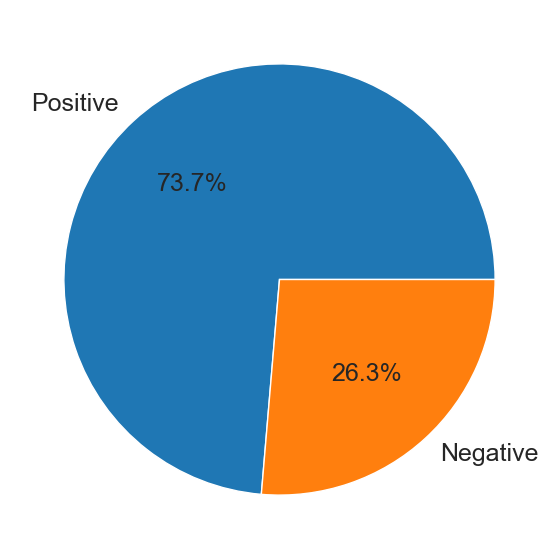

In [6]:
plt.pie(data['Rating'].value_counts(), labels=data['Rating'].unique().tolist(), autopct='%1.1f%%')
plt.show()

### Review Analysis

Number of characters in each review

In [7]:
data['Length'] = data['Review'].str.len()
data.head(10)

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,Positive,593
1,ok nothing special charge diamond member hilto...,Negative,1689
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427
3,"unique, great stay, wonderful time hotel monac...",Positive,600
4,"great stay great stay, went seahawk game aweso...",Positive,1281
5,love monaco staff husband stayed hotel crazy w...,Positive,1002
6,"cozy stay rainy city, husband spent 7 nights m...",Positive,748
7,"excellent staff, housekeeping quality hotel ch...",Positive,597
8,"hotel stayed hotel monaco cruise, rooms genero...",Positive,419
9,excellent stayed hotel monaco past w/e delight...,Positive,271


Number of words in each review

In [8]:
def word_count(review):
    review_list = review.split()
    return len(review_list)
data['Word_count'] = data['Review'].apply(word_count)
data.head(10)

,Review,Rating,Length,Word_count
0,nice hotel expensive parking got good deal sta...,Positive,593,87
1,ok nothing special charge diamond member hilto...,Negative,1689,250
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191
5,love monaco staff husband stayed hotel crazy w...,Positive,1002,134
6,"cozy stay rainy city, husband spent 7 nights m...",Positive,748,101
7,"excellent staff, housekeeping quality hotel ch...",Positive,597,85
8,"hotel stayed hotel monaco cruise, rooms genero...",Positive,419,59
9,excellent stayed hotel monaco past w/e delight...,Positive,271,35


In [9]:
def sent_count(review):
    return len(tokenize.sent_tokenize(review))
data['Sent_count'] = data['Review'].apply(sent_count)
data.head(10)

,Review,Rating,Length,Word_count,Sent_count
0,nice hotel expensive parking got good deal sta...,Positive,593,87,1
1,ok nothing special charge diamond member hilto...,Negative,1689,250,1
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217,2
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89,1
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191,1
5,love monaco staff husband stayed hotel crazy w...,Positive,1002,134,1
6,"cozy stay rainy city, husband spent 7 nights m...",Positive,748,101,1
7,"excellent staff, housekeeping quality hotel ch...",Positive,597,85,1
8,"hotel stayed hotel monaco cruise, rooms genero...",Positive,419,59,1
9,excellent stayed hotel monaco past w/e delight...,Positive,271,35,1


Mean length of each word in review

In [10]:
data['mean_word_length'] = data['Review'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
data.head(10)

,Review,Rating,Length,Word_count,Sent_count,mean_word_length
0,nice hotel expensive parking got good deal sta...,Positive,593,87,1,5.804598
1,ok nothing special charge diamond member hilto...,Negative,1689,250,1,5.752000
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217,2,5.571429
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89,1,5.730337
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191,1,5.701571
5,love monaco staff husband stayed hotel crazy w...,Positive,1002,134,1,6.470149
6,"cozy stay rainy city, husband spent 7 nights m...",Positive,748,101,1,6.396040
7,"excellent staff, housekeeping quality hotel ch...",Positive,597,85,1,6.011765
8,"hotel stayed hotel monaco cruise, rooms genero...",Positive,419,59,1,6.084746
9,excellent stayed hotel monaco past w/e delight...,Positive,271,35,1,6.714286


Mean length of each sentence in review

In [11]:
# tokenize.sent_tokenize(review) splits review into sentences and return them as a list 

In [12]:
data['mean_sent_length'] = data['Review'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
data.head(10)

,Review,Rating,Length,Word_count,Sent_count,mean_word_length,mean_sent_length
0,nice hotel expensive parking got good deal sta...,Positive,593,87,1,5.804598,591.0
1,ok nothing special charge diamond member hilto...,Negative,1689,250,1,5.752000,1687.0
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217,2,5.571429,712.0
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89,1,5.730337,598.0
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191,1,5.701571,1279.0
5,love monaco staff husband stayed hotel crazy w...,Positive,1002,134,1,6.470149,1000.0
6,"cozy stay rainy city, husband spent 7 nights m...",Positive,748,101,1,6.396040,746.0
7,"excellent staff, housekeeping quality hotel ch...",Positive,597,85,1,6.011765,595.0
8,"hotel stayed hotel monaco cruise, rooms genero...",Positive,419,59,1,6.084746,417.0
9,excellent stayed hotel monaco past w/e delight...,Positive,271,35,1,6.714286,269.0


In [13]:
def visualize(col):
    plt.figure(figsize=(12, 5))  # Add figure size for better spacing

    # Box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data['Rating'].astype(str), y=data[col])  # Use x instead of hue
    plt.ylabel(col, labelpad=12.5)

    # KDE plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=data, x=col, hue=data['Rating'].astype(str))  # Use x and cast hue as str
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

In [14]:
data['Rating'] = data['Rating'].astype(str)

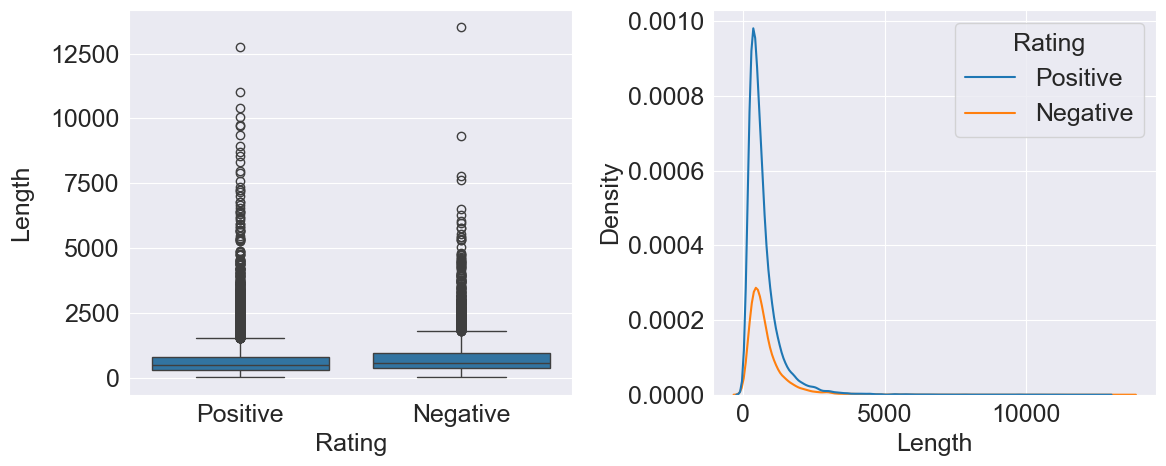

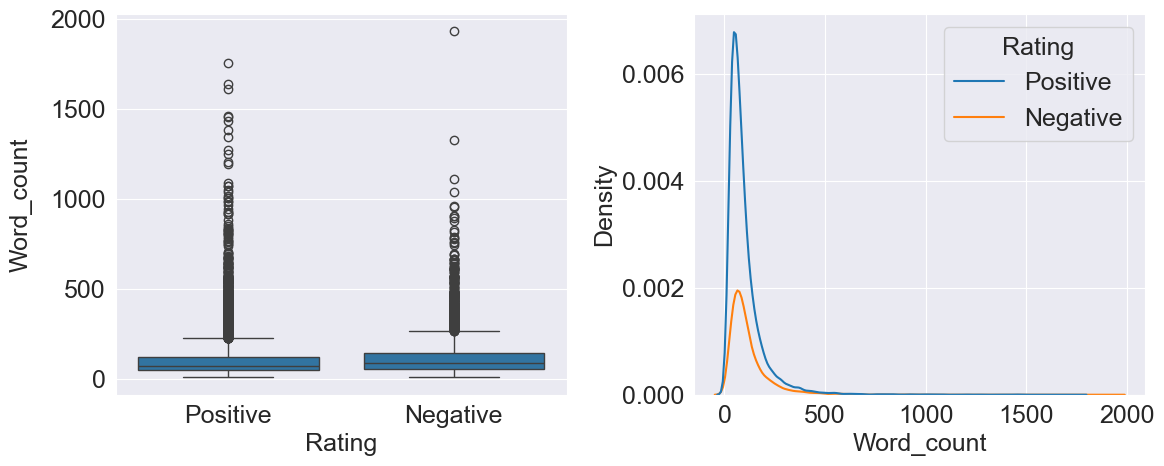

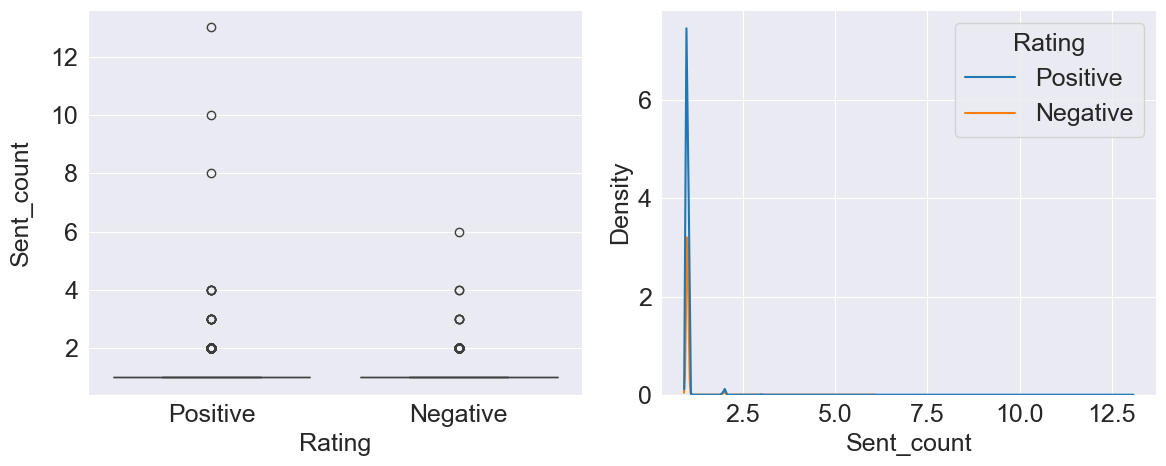

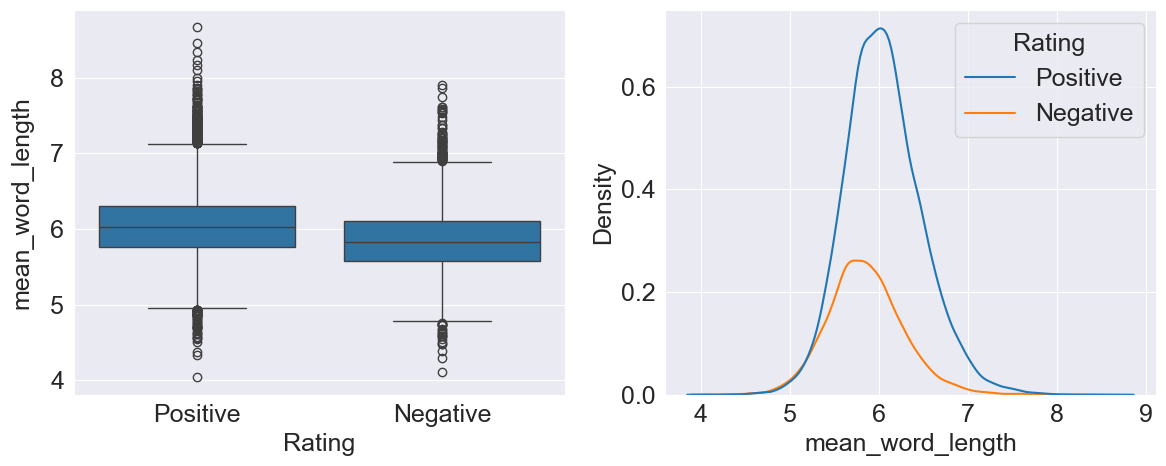

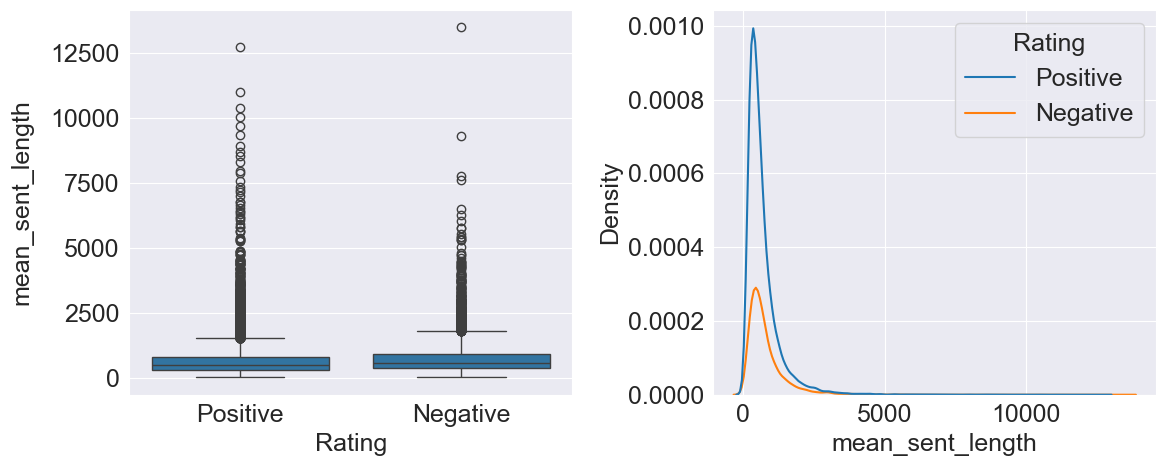

In [15]:
features = data.columns.tolist()[2:]
for feature in features:
    visualize(feature)

## Term Frequency Analysis

In [16]:
df = data.drop(features, axis=1)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms not 4* experience hotel monaco seat...,Negative
3,"unique, great stay, wonderful time hotel monac...",Positive
4,"great stay great stay, went seahawk game aweso...",Positive


Check for null

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  object
dtypes: object(2)
memory usage: 320.3+ KB


### Preprocess Data

"+" replaces all consecutive once TEST

In [18]:
re.sub('[^a-zA-Z0-9-]', '/', "Hello!!! World??")

'Hello////World//'

In [19]:
re.sub('[^a-zA-Z0-9-]+', '/', "Hello!!! World??")

'Hello/World/'

In [20]:
# Load stopwords once
stop_words = set(stopwords.words('english'))

def clean(review):
    # Convert to lowercase
    review = review.lower()
    # replace char that are NOT(^) lower case (a-z), number(0-9), hyphen(-) at once(+)
    review = re.sub('[^a-z0-9- ]+', '', review)
    # Remove stopwords using list comprehension
    review = " ".join(word for word in review.split() if word not in stop_words)
    # Splits the cleaned text into words using split(), which splits by whitespace.
    # Filters out any word that is in the list of English stopwords from nltk.corpus.stopwords.
    # Joins the remaining words back into a single string with spaces between them.
    return review

# Use pandas' apply with progress bar for better visibility
from tqdm import tqdm
tqdm.pandas()

In [21]:
# Apply the clean function with progress bar
df['Review'] = df['Review'].progress_apply(clean)
df.head(10)

100%|██████████| 20491/20491 [00:00<00:00, 35450.12it/s]


,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms 4 experience hotel monaco seattle g...,Negative
3,unique great stay wonderful time hotel monaco ...,Positive
4,great stay great stay went seahawk game awesom...,Positive
5,love monaco staff husband stayed hotel crazy w...,Positive
6,cozy stay rainy city husband spent 7 nights mo...,Positive
7,excellent staff housekeeping quality hotel cho...,Positive
8,hotel stayed hotel monaco cruise rooms generou...,Positive
9,excellent stayed hotel monaco past delight rec...,Positive


In [22]:
df['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non-existent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay 40 parking night'

Split review into a list of words

In [23]:
def corpus(text):
    text_list = text.split()
    return text_list

In [24]:
df['Review_lists'] = df['Review'].apply(corpus)
df.head(10)

,Review,Rating,Review_lists
0,nice hotel expensive parking got good deal sta...,Positive,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,Negative,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms 4 experience hotel monaco seattle g...,Negative,"[nice, rooms, 4, experience, hotel, monaco, se..."
3,unique great stay wonderful time hotel monaco ...,Positive,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,Positive,"[great, stay, great, stay, went, seahawk, game..."
5,love monaco staff husband stayed hotel crazy w...,Positive,"[love, monaco, staff, husband, stayed, hotel, ..."
6,cozy stay rainy city husband spent 7 nights mo...,Positive,"[cozy, stay, rainy, city, husband, spent, 7, n..."
7,excellent staff housekeeping quality hotel cho...,Positive,"[excellent, staff, housekeeping, quality, hote..."
8,hotel stayed hotel monaco cruise rooms generou...,Positive,"[hotel, stayed, hotel, monaco, cruise, rooms, ..."
9,excellent stayed hotel monaco past delight rec...,Positive,"[excellent, stayed, hotel, monaco, past, delig..."


Put all words into a giant list

In [25]:
from itertools import chain

corpus = list(chain.from_iterable(df['Review_lists']))
len(corpus)

2060911

### Most Common Words

In [26]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('hotel', 48844),
 ('room', 34279),
 ('great', 21068),
 ('nt', 18989),
 ('good', 16953),
 ('staff', 16193),
 ('stay', 15142),
 ('nice', 12393),
 ('rooms', 12005),
 ('location', 11009)]

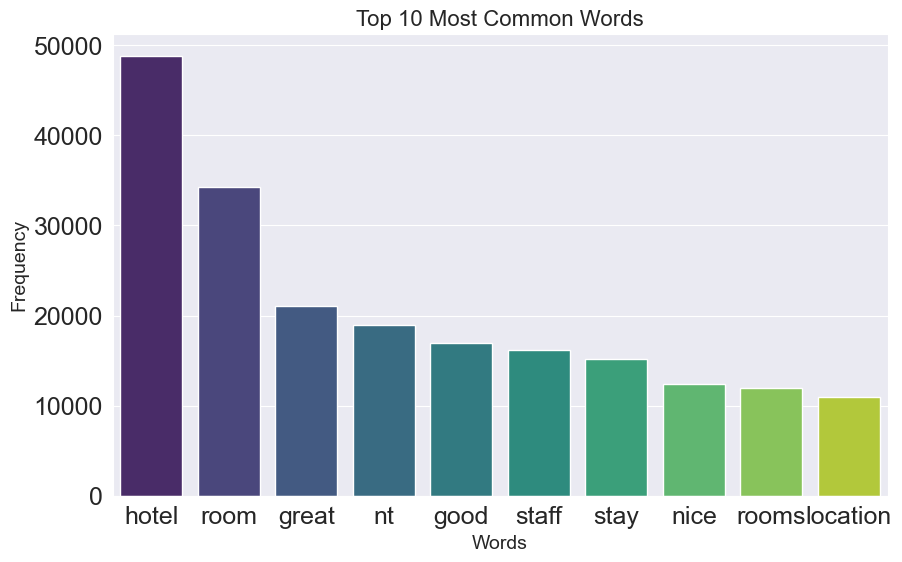

In [27]:
# Unzip the words and counts
words, counts = zip(*mostCommon)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts), palette='viridis')

# Add titles and labels
plt.title('Top 10 Most Common Words', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show plot
plt.show()

### N-grams

In [30]:
def plot_ngram_frequency(corpus, n=2, top_n=10):
    # Generate n-grams
    from nltk.util import ngrams
    n_grams = ngrams(corpus, n)
    
    # Count the frequency of each n-gram
    ngram_freq = Counter(n_grams)
    
    # Get the most common n-grams
    most_common_ngrams = ngram_freq.most_common(top_n)
    
    # Unzip the n-grams and their counts
    ngrams, counts = zip(*most_common_ngrams)
    ngrams = [' '.join(ngram) for ngram in ngrams]  # Join the n-grams as strings
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(ngrams), y=list(counts), palette='viridis')
    plt.title(f'Top {top_n} Most Common {n}-grams', fontsize=16)
    plt.xlabel(f'{n}-grams', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.show()

#### Bi-grams

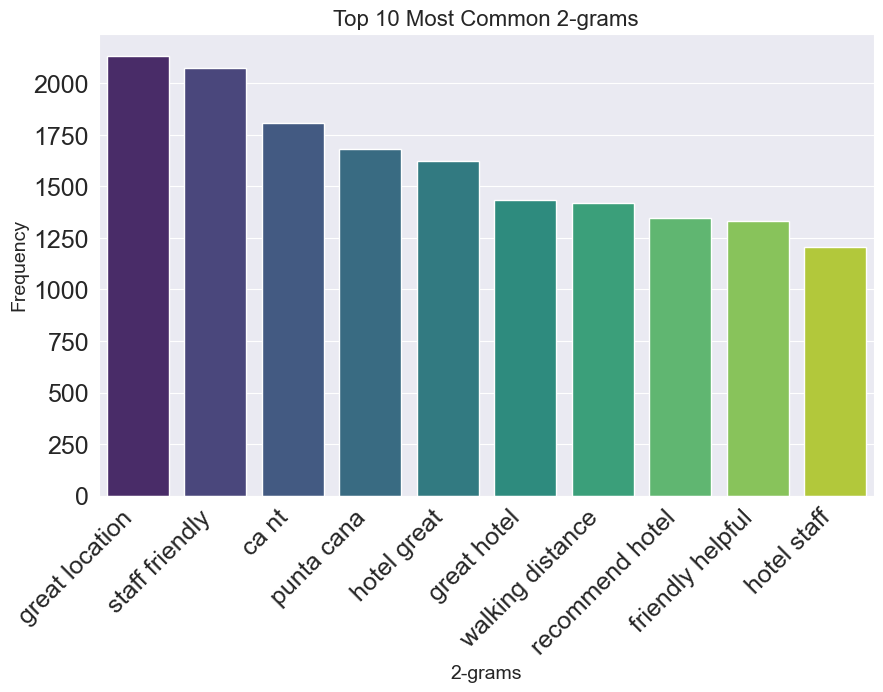

In [32]:
plot_ngram_frequency(corpus, n=2, top_n=10)

#### Tri-grams

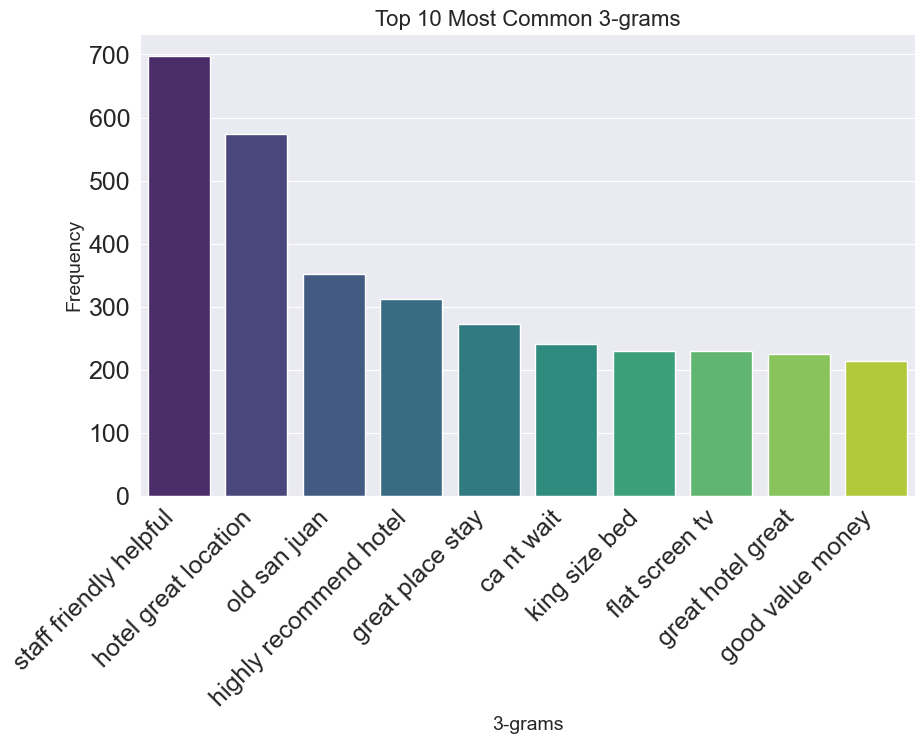

In [33]:
plot_ngram_frequency(corpus, n=3, top_n=10)

### Sentiment Analysis using HuggingFace Transformer

Device set to use cuda:0


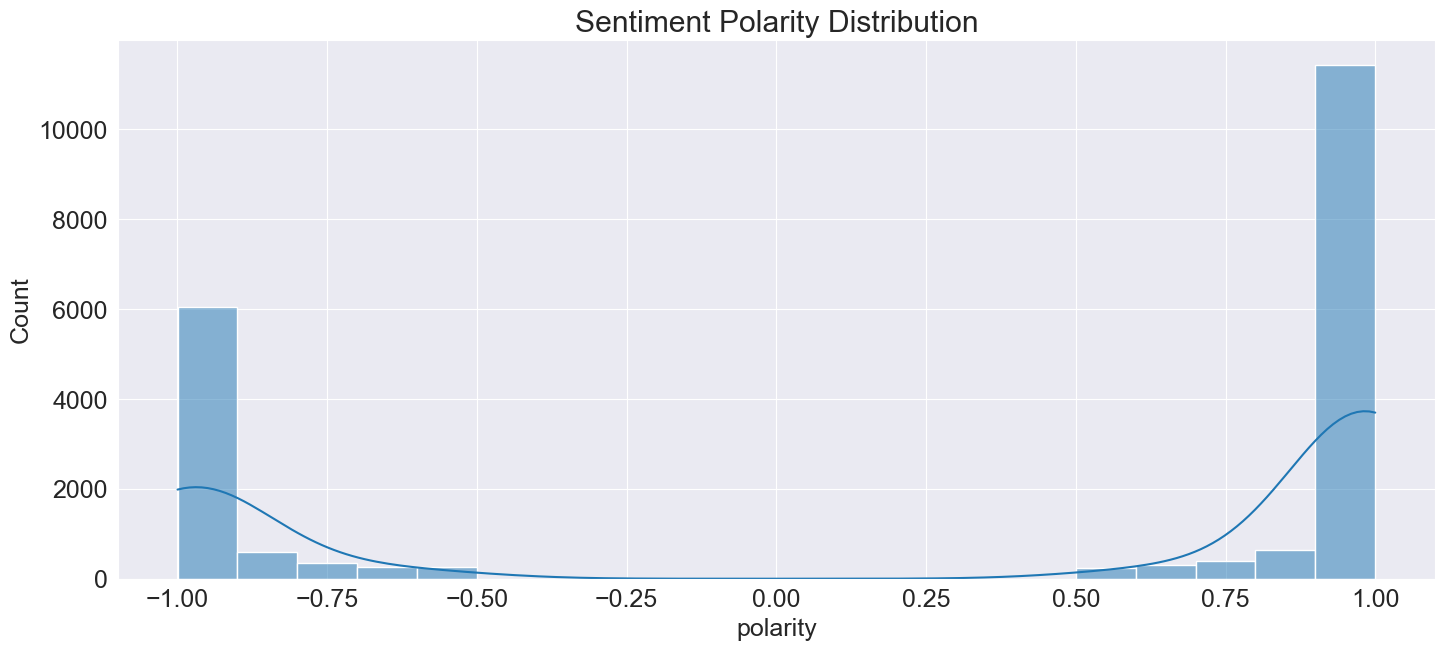

In [60]:
from transformers import pipeline

# Call the hugging face model
classifier = pipeline("sentiment-analysis", model='distilbert-base-uncased-finetuned-sst-2-english')

# Apply sentiment analysis 
def sentiment_analysis(text):
    result = classifier(text, truncation=True)
    score = result[0]['score']
    label = result[0]['label']

    if label == "POSITIVE":
        return score
    else:
        return -score
    
df['polarity'] = df['Review'].apply(sentiment_analysis)

# Visualize the polarity distribution
sns.histplot(df['polarity'], bins=20, kde=True)
plt.title("Sentiment Polarity Distribution")
plt.show()

In [58]:
df['polarity']

0        None
1        None
2        None
3        None
4        None
         ... 
20486    None
20487    None
20488    None
20489    None
20490    None
Name: polarity, Length: 20491, dtype: object

### Part-of-Speech (POS) Tagging

Identify the frequency of nouns, verbs, adjectives, etc.

In [52]:
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger_eng')

pos_counts = Counter()
for text in df['Review']:
    tokens = nltk.word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    pos_counts.update(tag for word, tag in tags)

print(pos_counts.most_common(10))

[('NN', 778761), ('JJ', 484343), ('NNS', 203588), ('VBD', 124925), ('RB', 110319), ('VBP', 89644), ('VBG', 74805), ('CD', 56920), ('VBN', 44469), ('IN', 21906)]


### Topic Modeling (LDA)

Identify underlying topics within a corpus.

In [42]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
# max_df=0.9: Words that appear in more than 90% of the documents are excluded. This is to avoid over-representing very common words that don’t help in distinguishing topics.
# min_df=2: Words that appear in fewer than 2 documents are excluded. This helps eliminate rare words that might not be useful for topic modeling.
# stop_words='english': Common words like "the", "and", "is", etc., are ignored because they don’t provide meaningful insights for topic modeling.
X = vectorizer.fit_transform(df['Review'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

print("Top words in each topic:")
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx+1}: ", [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Top words in each topic:
Topic 1:  ['rooms', 'stay', 'clean', 'staff', 'breakfast', 'location', 'great', 'good', 'room', 'hotel']
Topic 2:  ['wonderful', 'rooms', 'location', 'stayed', 'service', 'stay', 'room', 'staff', 'great', 'hotel']
Topic 3:  ['stayed', 'good', 'car', 'parking', 'beach', 'stay', 'room', 'nice', 'great', 'hotel']
Topic 4:  ['staff', 'rooms', 'told', 'night', 'service', 'desk', 'stay', 'nt', 'hotel', 'room']
Topic 5:  ['people', 'room', 'time', 'pool', 'great', 'good', 'food', 'nt', 'resort', 'beach']


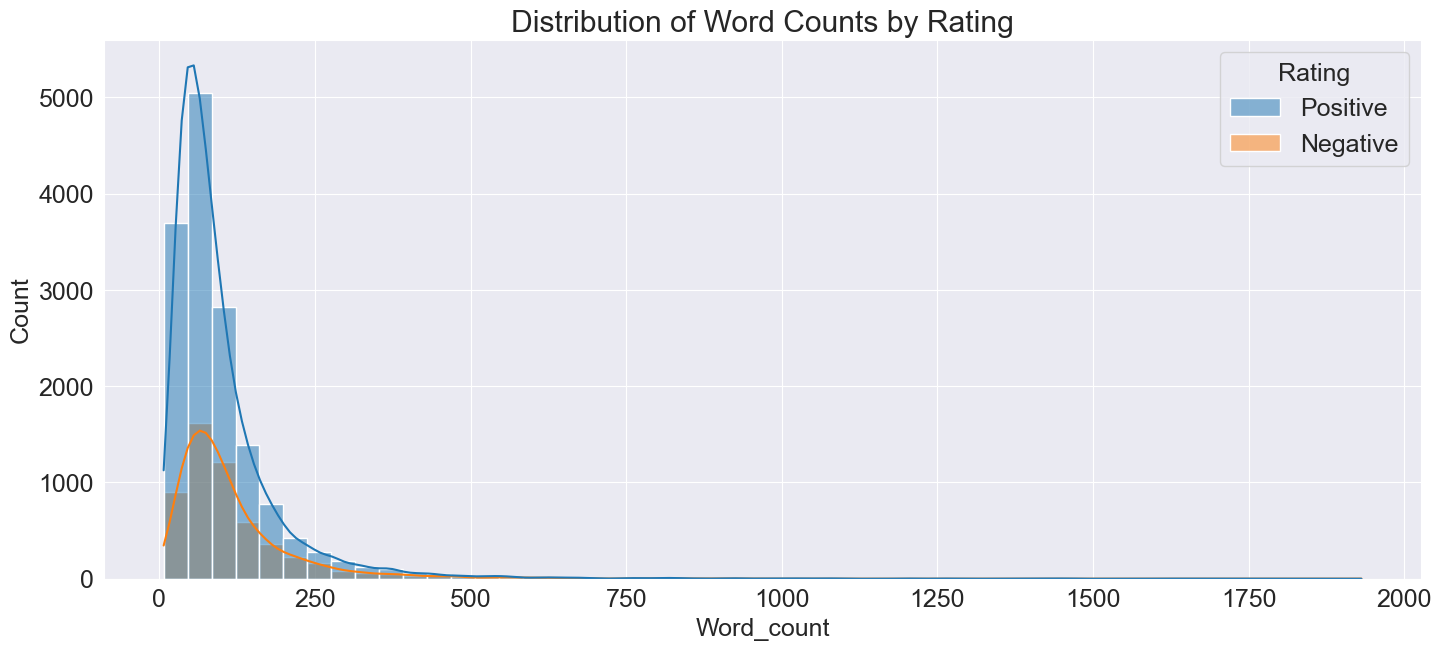

In [46]:
sns.histplot(data=data, x='Word_count', hue='Rating', bins=50, kde=True)
plt.title("Distribution of Word Counts by Rating")
plt.show()

In [51]:
print(f"Number of positive reviews: {sum(data["Rating"]=='Positive')}")
print(f"Number of negative reviews: {sum(data["Rating"]=='Negative')}")

Number of positive reviews: 15093
Number of negative reviews: 5398


### TF-IDF Analysis

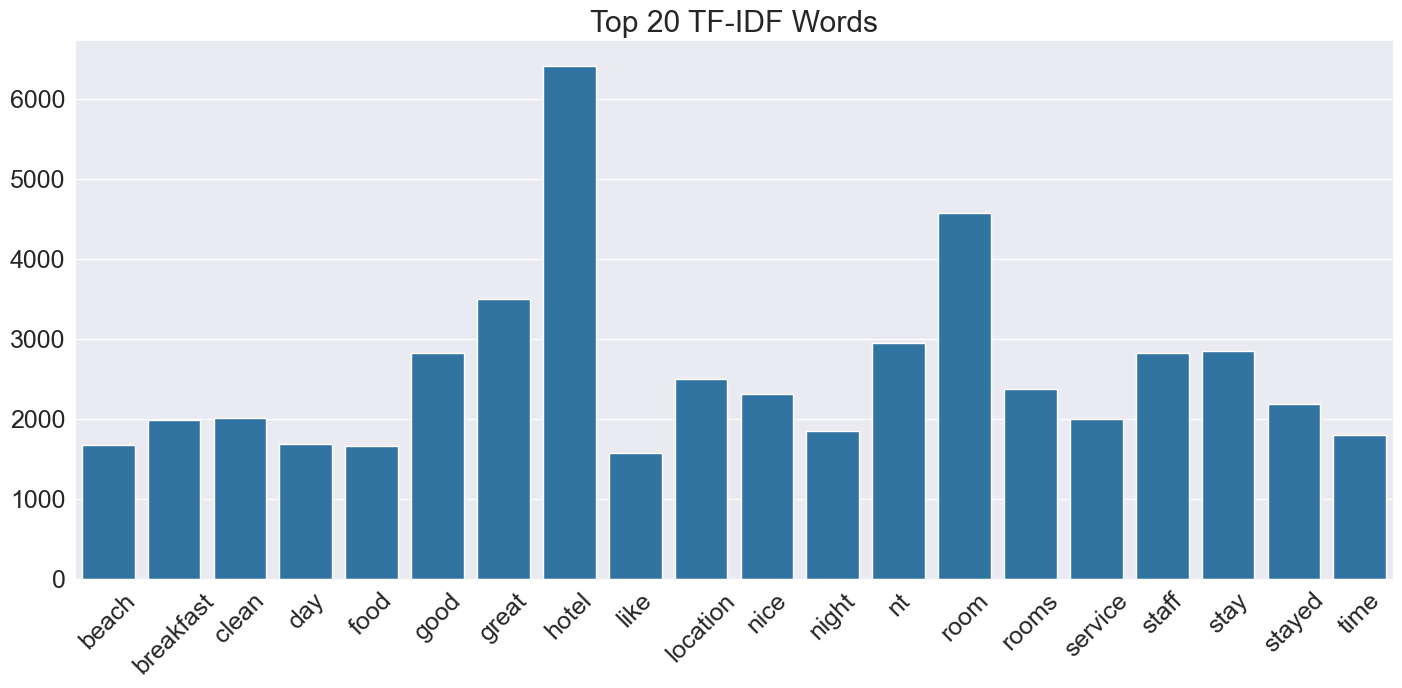

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=20)
X = tfidf.fit_transform(df['Review'])
features = tfidf.get_feature_names_out()

tfidf_scores = X.sum(axis=0).tolist()[0]
sns.barplot(x=features, y=tfidf_scores)
plt.title("Top 20 TF-IDF Words")
plt.xticks(rotation=45)
plt.show()